In [20]:
from imblearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE, RandomOverSampler
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import KFold
from yellowbrick.classifier import ConfusionMatrix
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import cross_validate, cross_val_predict
from sklearn.metrics import recall_score
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import plotly.express as px
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from xgboost import plot_tree as plot_tree_xgb

In [2]:
# read the hotel reservation file

hotel = pd.read_csv('Hotel Reservations.csv')
pd.options.display.max_colwidth = 100

In [3]:
hotel = hotel.drop('Booking_ID', axis = 1)

In [4]:

label_encoder_type_of_meal_plan = LabelEncoder()
label_encoder_room_type_reserved = LabelEncoder()
label_encoder_market_segment_type = LabelEncoder()
label_encoder_booking_status = LabelEncoder()

hotel['type_of_meal_plan'] = label_encoder_type_of_meal_plan.fit_transform(hotel['type_of_meal_plan'])
hotel['room_type_reserved'] = label_encoder_room_type_reserved.fit_transform(hotel['room_type_reserved'])
hotel['market_segment_type'] = label_encoder_market_segment_type.fit_transform(hotel['market_segment_type'])
hotel['booking_status'] = label_encoder_booking_status.fit_transform(hotel['booking_status'])


In [5]:
le_name_mapping = dict(zip(label_encoder_booking_status.classes_, label_encoder_booking_status.transform(label_encoder_booking_status.classes_)))
print(le_name_mapping)

{'Canceled': 0, 'Not_Canceled': 1}


In [6]:
X_not_altered = hotel.drop('booking_status', axis = 1)

In [7]:
X = hotel.drop('booking_status', axis = 1)
X_copy = X.copy()
X = X.values
X_standard = StandardScaler().fit_transform(X)
y = hotel['booking_status']

In [8]:
x_train, x_test, y_train, y_test = train_test_split(X_standard, y, test_size=0.2, random_state=42)

In [9]:
scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']

kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Naive Bayes

In [150]:

classifier = make_pipeline(SMOTE(random_state=100), GaussianNB(var_smoothing=1e-03))

scores = cross_validate(classifier, X, y, scoring=scoring, cv=kf)
print(scores)
print("Mean score for accuracy: ", scores['test_accuracy'].mean())
print("Mean score for precision: ", scores['test_precision'].mean())
print("Mean score for recall: ", scores['test_recall'].mean())
print("Mean score for f1: ", scores['test_f1'].mean())
print("Mean score for roc_auc: ", scores['test_roc_auc'].mean())


{'fit_time': array([0.30420923, 0.29574347, 0.33300662, 0.2753098 , 0.29115939]), 'score_time': array([0.03061485, 0.03063512, 0.04123664, 0.02605915, 0.03723621]), 'test_accuracy': array([0.73494142, 0.72984149, 0.72929014, 0.72170917, 0.73618194]), 'test_precision': array([0.80591691, 0.80535381, 0.80104822, 0.8059126 , 0.81132853]), 'test_recall': array([0.79375904, 0.79155619, 0.7901158 , 0.77169231, 0.79785295]), 'test_f1': array([0.79979178, 0.79839539, 0.79554445, 0.78843131, 0.80453431]), 'test_roc_auc': array([0.78576227, 0.77168619, 0.77467742, 0.77310291, 0.78035137])}
Mean score for accuracy:  0.7303928325292902
Mean score for precision:  0.8059120122043858
Mean score for recall:  0.788995256843682
Mean score for f1:  0.797339448606072
Mean score for roc_auc:  0.7771160301919415


0.7343900758097863

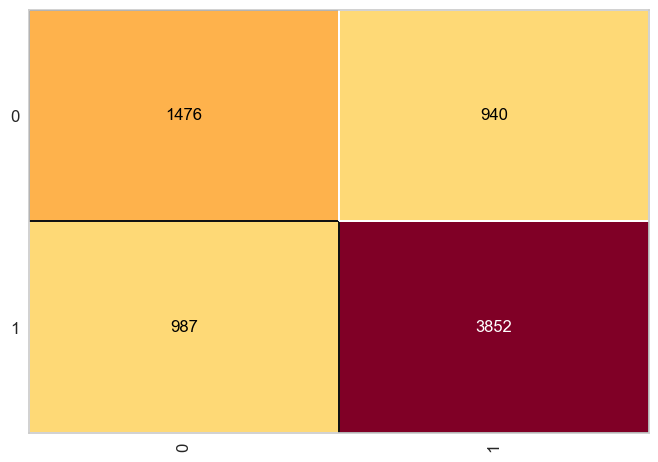

In [149]:
cm = ConfusionMatrix(classifier)
cm.fit(x_train, y_train)
cm.score(x_test, y_test)

# KNN

In [92]:
X_temp = X_copy.drop(["arrival_year"], axis=1)
X_temp = X_temp.values
X_temp_standard = StandardScaler().fit_transform(X_temp)

In [93]:

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
scores = []

#Determine the best number of neighbours
knn = KNeighborsClassifier()
classifier = make_pipeline(StandardScaler(), SMOTE(random_state=100), knn)

no_neighbours_list = list(range(1,10))
# k_values = dict(n_neighbors = no_neighbours_list)
params = {'kneighborsclassifier__n_neighbors': no_neighbours_list}
# perform a new split inside method
grid = GridSearchCV(classifier, param_grid=params, cv = kf, scoring =  scoring, n_jobs = -1, refit = False)

In [ ]:
grid.fit(X, y)

In [94]:
accuracies = []
precisions = []
recalls = []
f1s = []
roc_aucs = []

for i in range(1, 10):
    knn = KNeighborsClassifier(n_neighbors=i)
    classifier = make_pipeline(StandardScaler(), SMOTE(random_state=100), knn)
    score = cross_validate(classifier, X, y, scoring=scoring, cv=kf)
    # take scores
    test_accuracy = score['test_accuracy'].mean() 
    test_precision = score['test_precision'].mean()
    test_recall = score['test_recall'].mean()
    test_f1 = score['test_f1'].mean()
    test_roc_auc = score['test_roc_auc'].mean()
    
    accuracies.append(test_accuracy)
    precisions.append(test_precision)
    recalls.append(test_recall)
    f1s.append(test_f1)
    roc_aucs.append(test_roc_auc)

    print("Iteration: ", i)


Iteration:  1
Iteration:  2
Iteration:  3
Iteration:  4
Iteration:  5
Iteration:  6
Iteration:  7
Iteration:  8
Iteration:  9


In [95]:
# create a dataframe of the scores
# scores_df = pd.DataFrame(scores, columns=['neighbors', 'score'])
# scores_df

scores = pd.DataFrame({'neighbors': no_neighbours_list, 'accuracy': accuracies, 'precision': precisions, 'recall': recalls, 'f1': f1s, 'roc_auc': roc_aucs})
scores.sort_values(by=['accuracy'], ascending=False)

,neighbors,accuracy,precision,recall,f1,roc_auc
0,1,0.847636,0.892689,0.879110,0.885832,0.831078
2,3,0.834045,0.903133,0.843678,0.872387,0.884430
4,5,0.832143,0.910208,0.832483,0.869609,0.899706
6,7,0.830737,0.912086,0.828102,0.868060,0.905474
8,9,0.826823,0.912448,0.821240,0.864439,0.908474
5,6,0.815245,0.924263,0.789960,0.851846,0.902840
1,2,0.814087,0.922032,0.790329,0.851110,0.865962
7,8,0.813728,0.921827,0.789958,0.850805,0.907307
3,4,0.812984,0.925190,0.785368,0.849559,0.894269


0.8537560303239146

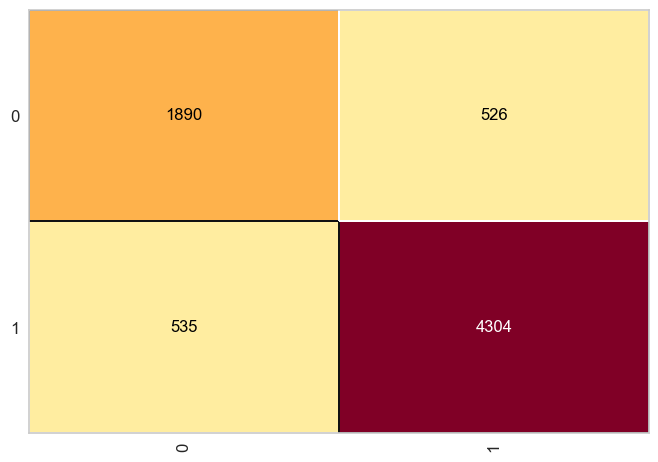

In [155]:
knn_classifier = KNeighborsClassifier(n_neighbors=1)

cm = ConfusionMatrix(knn_classifier)
cm.fit(x_train, y_train)
cm.score(x_test, y_test)

# Neural networks

In [ ]:
from keras.utils import np_utils
y_convert = np_utils.to_categorical(y)
X_standard = StandardScaler().fit_transform(X)

# train using Neural Network
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.optimizers import Adam, SGD, RMSprop
from keras.metrics import AUC, Precision, Recall, CategoricalAccuracy

metrics = [Precision(), Recall(), CategoricalAccuracy(), AUC()]

def test_model(optimizer, learning_rate):
    accuracies = []
    precisions = []
    recalls = []
    roc_aucs = []

    # implement k-fold cross validation
    fold_no = 1
    for train, test in kf.split(X_standard, y_convert):
        train_data_x, train_data_y = SMOTE(random_state=100).fit_resample(X_standard[train], y_convert[train])
        train_data_y = np_utils.to_categorical(train_data_y)

        model = Sequential()
        model.add(Dense(32, input_dim = 17, kernel_initializer = 'uniform', activation = 'relu'))
        model.add(Dropout(0.2)) 
        model.add(Dense(64, kernel_initializer = 'uniform', activation = 'relu'))
        model.add(Dropout(0.2)) 
        model.add(Dense(128, kernel_initializer = 'uniform', activation = 'relu'))
        model.add(Dropout(0.2)) 
        model.add(Dense(256, kernel_initializer = 'uniform', activation = 'relu'))
        model.add(Dropout(0.2)) 
        model.add(Dense(2, kernel_initializer = 'uniform', activation = 'softmax'))
        
        to_add_optimizer = optimizer(learning_rate=learning_rate)

        model.compile(loss='categorical_crossentropy', optimizer = to_add_optimizer, metrics=metrics)
        history = model.fit(train_data_x, train_data_y, epochs = 30, batch_size = 600, verbose = 0, use_multiprocessing=True) 
        scores = model.evaluate(X_standard[test], y_convert[test], verbose=0)

        print('Fold: ', fold_no)
        accuracies.append(scores[3])
        precisions.append(scores[1])
        recalls.append(scores[2])
        roc_aucs.append(scores[4])
        fold_no = fold_no + 1
    
    return np.mean(accuracies), np.mean(precisions), np.mean(recalls), np.mean(roc_aucs)
    


In [ ]:
# try different learning_rate 
learning_rate = [0.001, 0.01, 0.02, 0.03, 0.1]
optimizers = [Adam, SGD, RMSprop]

final_results = []

for optimizer in optimizers:
    for lr in learning_rate:
        print("Optimizer: ", optimizer.__name__)
        print("Learning rate: ", lr)
        final_results.append((optimizer.__name__, lr, test_model(optimizer, lr)))

In [ ]:
# vizualize the results
def display_statistics(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(acc) + 1)

    plt.plot(epochs, acc, 'bo', label='Training acc')
    plt.plot(epochs, val_acc, 'b', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.savefig('statistics/overflow-acc.png')
    plt.figure()
    plt.plot(epochs, loss, 'bo', label='Training loss')
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()
    plt.savefig('statistics/overflow-val.png')
    plt.show()

# Decision Trees

In [ ]:
min_split = np.array([2, 3, 4, 5, 6, 7])
max_nvl = np.array([3, 4, 5, 6, 7, 9, 11])
alg = ['entropy', 'gini']
values_grid = {'decisiontreeclassifier__min_samples_split': min_split, 'decisiontreeclassifier__max_depth': max_nvl, 'decisiontreeclassifier__criterion': alg}

tree = DecisionTreeClassifier()
classifier = make_pipeline(StandardScaler(), SMOTE(random_state=100), tree)

grid = GridSearchCV(classifier, param_grid=values_grid, cv = kf, scoring =  scoring, n_jobs = -1, refit = False)

In [ ]:
grid.fit(X, y)

In [173]:
columns = ["mean_test_accuracy", "mean_test_precision", "mean_test_recall", "mean_test_f1", "mean_test_roc_auc"]
params = pd.DataFrame(grid.cv_results_['params'])
scores = pd.DataFrame(grid.cv_results_)[columns]
scores = pd.concat([params, scores], axis=1)

#rename columns
scores.columns = ['criterion', 'max_depth', 'min_samples_split', 'accuracy', 'precision', 'recall', 'f1', 'roc_auc']
scores.sort_values(by=['accuracy'], ascending=False)


,criterion,max_depth,min_samples_split,accuracy,precision,recall,f1,roc_auc
36,entropy,11,2,0.862853,0.908806,0.885243,0.896604,0.929395
39,entropy,11,5,0.862826,0.908737,0.885284,0.896588,0.929613
38,entropy,11,4,0.862826,0.908664,0.885364,0.896598,0.929581
40,entropy,11,6,0.862660,0.908606,0.885163,0.896471,0.929878
37,entropy,11,3,0.862467,0.908365,0.885125,0.896334,0.928899
...,...,...,...,...,...,...,...,...
5,entropy,3,7,0.786492,0.862204,0.812250,0.836467,0.820231
4,entropy,3,6,0.786492,0.862204,0.812250,0.836467,0.820231
3,entropy,3,5,0.786492,0.862204,0.812250,0.836467,0.820231
2,entropy,3,4,0.786492,0.862204,0.812250,0.836467,0.820231


0.8729152308752585

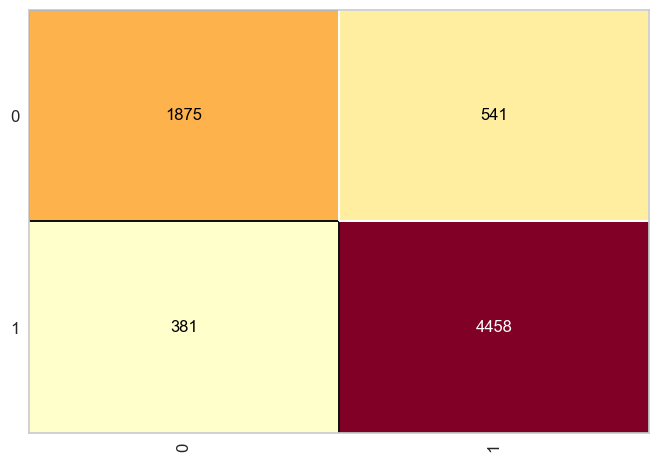

In [182]:
tree_classifier = DecisionTreeClassifier(criterion='entropy', max_depth=11, min_samples_split=2)
tree_classifier.fit(x_train, y_train)
y_pred = tree_classifier.predict(x_test)

cm = ConfusionMatrix(tree_classifier)
cm.fit(x_train, y_train)
cm.score(x_test, y_test)

[Text(0.5762362637362637, 0.9285714285714286, 'lead_time <= 0.771\nentropy = 0.911\nsamples = 29020\nvalue = [9469, 19551]\nclass = No'),
 Text(0.3118131868131868, 0.7857142857142857, 'no_of_special_requests <= -0.152\nentropy = 0.779\nsamples = 23294\nvalue = [5367, 17927]\nclass = No'),
 Text(0.1620879120879121, 0.6428571428571429, 'market_segment_type <= -0.077\nentropy = 0.916\nsamples = 12134\nvalue = [4023, 8111]\nclass = No'),
 Text(0.08791208791208792, 0.5, 'lead_time <= 0.061\nentropy = 0.593\nsamples = 6172\nvalue = [886, 5286]\nclass = No'),
 Text(0.04395604395604396, 0.35714285714285715, 'no_of_weekend_nights <= -0.357\nentropy = 0.417\nsamples = 4790\nvalue = [404, 4386]\nclass = No'),
 Text(0.02197802197802198, 0.21428571428571427, 'avg_price_per_room <= 2.795\nentropy = 0.242\nsamples = 2848\nvalue = [114, 2734]\nclass = No'),
 Text(0.01098901098901099, 0.07142857142857142, '\n  (...)  \n'),
 Text(0.03296703296703297, 0.07142857142857142, '\n  (...)  \n'),
 Text(0.065934

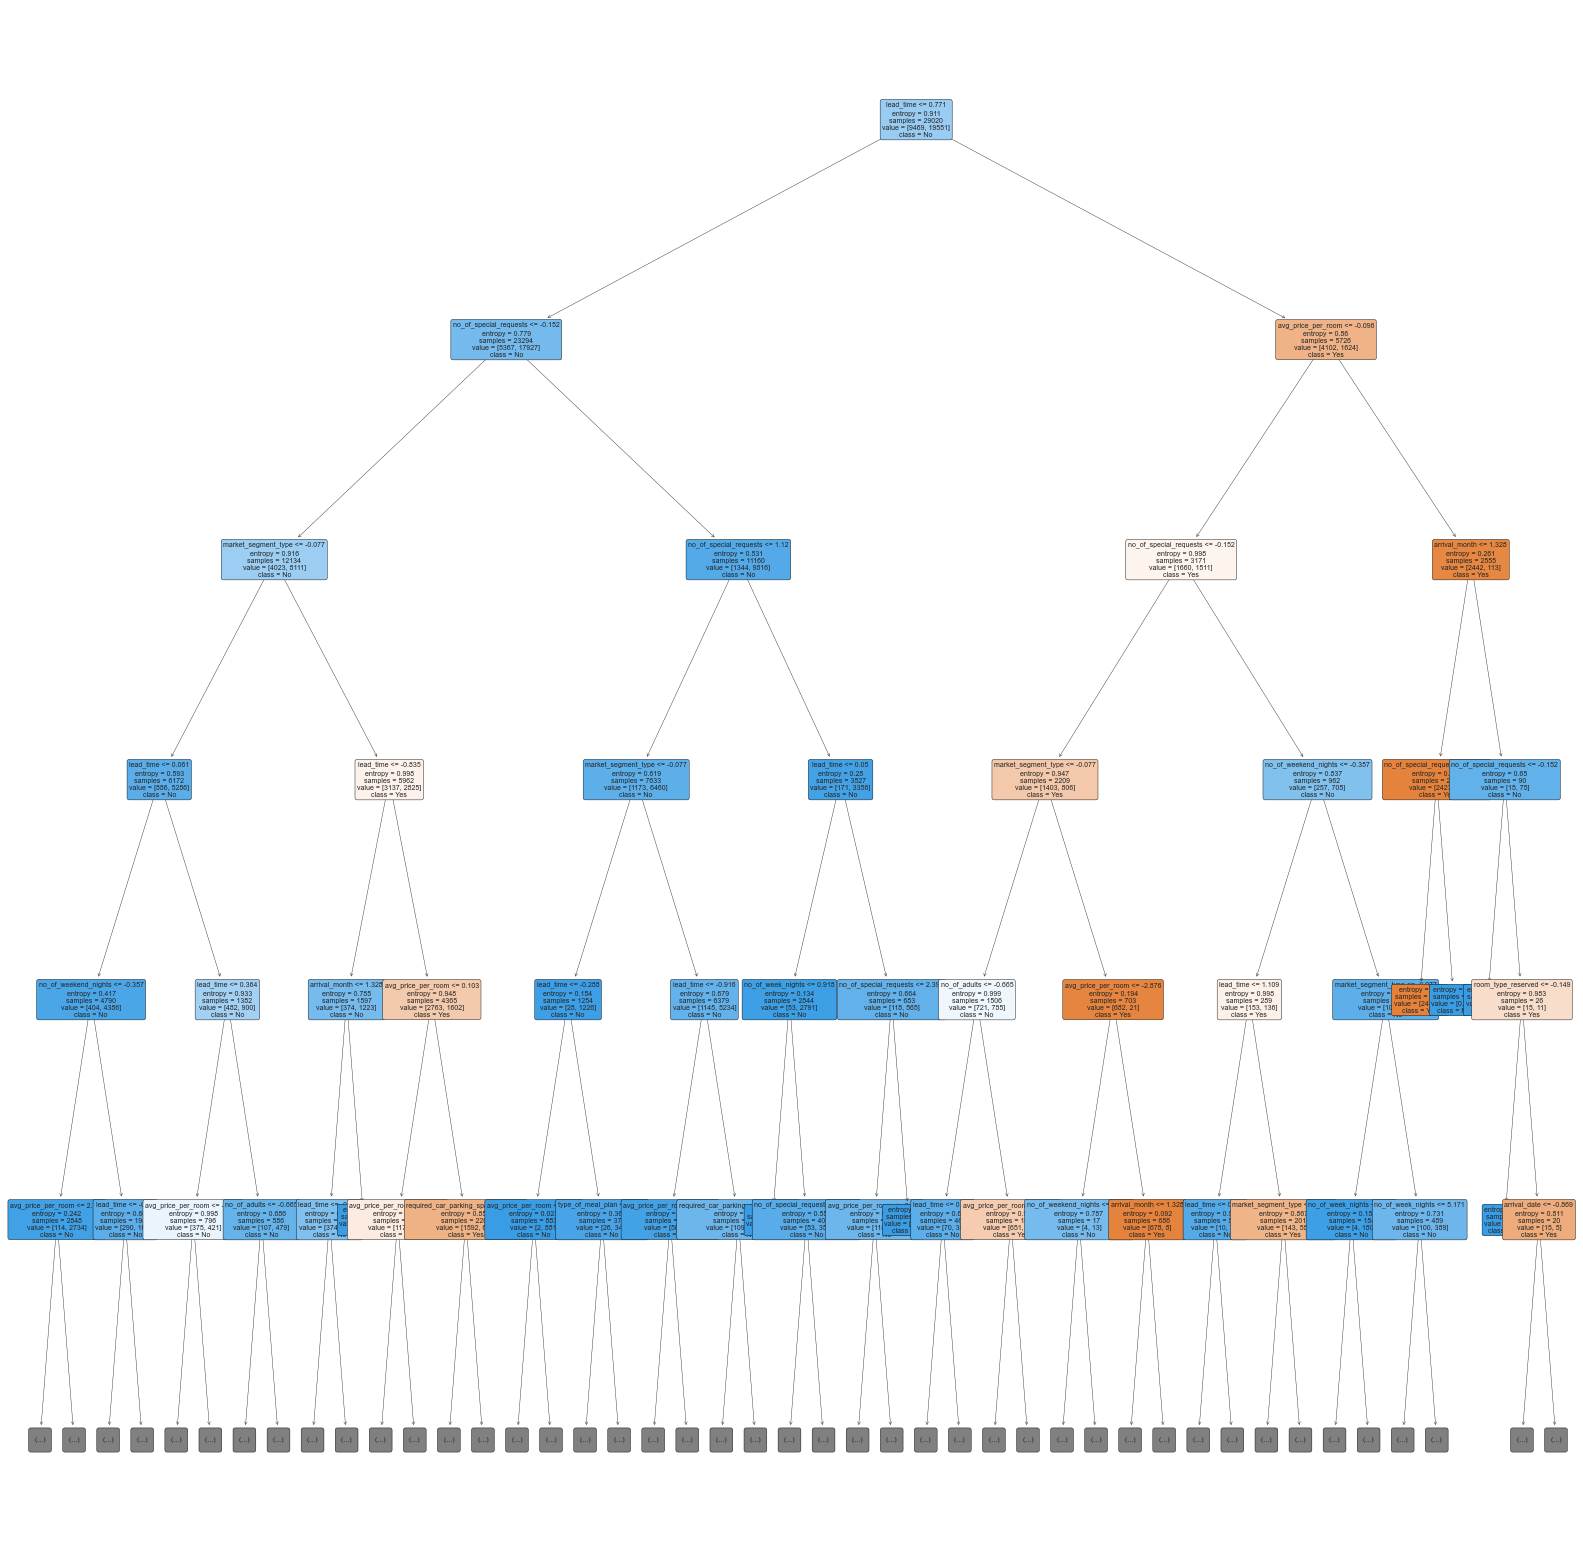

In [189]:
#We plotted a tree where the depth was 5, to show how the tree is built

plt.figure(figsize=(20,20))
plot_tree(tree_classifier, filled=True, rounded=True, class_names=['Yes', 'No'], feature_names=X_not_altered.columns, max_depth=5, fontsize=5)

# Random forest

In [214]:
n_estimators = np.array([100])
alg = ['entropy', 'gini']
min_split = np.array([2, 3, 4, 5, 6, 7])
max_nvl = np.array([3, 4, 5, 6, 7, 9, 11])
values_grid = {'randomforestclassifier__n_estimators': n_estimators, 'randomforestclassifier__min_samples_split': min_split, 'randomforestclassifier__max_depth': max_nvl, 'randomforestclassifier__criterion': alg}
classifier = make_pipeline(StandardScaler(), SMOTE(random_state=100), RandomForestClassifier()) 

gridRandomForest = GridSearchCV(classifier , param_grid = values_grid, cv = kf, scoring = scoring, n_jobs = -1, refit = False)

In [215]:
gridRandomForest.fit(X, y)

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('smote', SMOTE(random_state=100)),
                                       ('randomforestclassifier',
                                        RandomForestClassifier())]),
             n_jobs=-1,
             param_grid={'randomforestclassifier__criterion': ['entropy',
                                                               'gini'],
                         'randomforestclassifier__max_depth': array([ 3,  4,  5,  6,  7,  9, 11]),
                         'randomforestclassifier__min_samples_split': array([2, 3, 4, 5, 6, 7]),
                         'randomforestclassifier__n_estimators': array([100])},
             refit=False,
             scoring=['accuracy', 'precision', 'recall', 'f1', 'roc_auc'])

In [218]:
columns = ["mean_test_accuracy", "mean_test_precision", "mean_test_recall", "mean_test_f1", "mean_test_roc_auc"]
params = pd.DataFrame(gridRandomForest.cv_results_['params'])
scores = pd.DataFrame(gridRandomForest.cv_results_)[columns]
scores = pd.concat([params, scores], axis=1)

#rename columns
scores.columns = ['criterion', 'max_depth', 'min_samples_split', 'n_estimators', 'accuracy', 'precision', 'recall', 'f1', 'roc_auc']
scores.sort_values(by=['accuracy'], ascending=False)

,criterion,max_depth,min_samples_split,n_estimators,accuracy,precision,recall,f1,roc_auc
79,gini,11,3,100,0.879338,0.906817,0.914511,0.910642,0.940346
83,gini,11,7,100,0.879311,0.906353,0.915045,0.910672,0.939952
78,gini,11,2,100,0.879283,0.907447,0.913656,0.910534,0.940471
80,gini,11,4,100,0.879228,0.906445,0.914798,0.910595,0.940221
81,gini,11,5,100,0.879145,0.906900,0.914102,0.910480,0.939925
...,...,...,...,...,...,...,...,...,...
0,entropy,3,2,100,0.783846,0.878268,0.787810,0.830477,0.858781
5,entropy,3,7,100,0.783790,0.873806,0.792988,0.831422,0.856339
1,entropy,3,3,100,0.783487,0.871850,0.794877,0.831552,0.858246
46,gini,3,6,100,0.783405,0.874912,0.790992,0.830811,0.859535


0.878842177808408

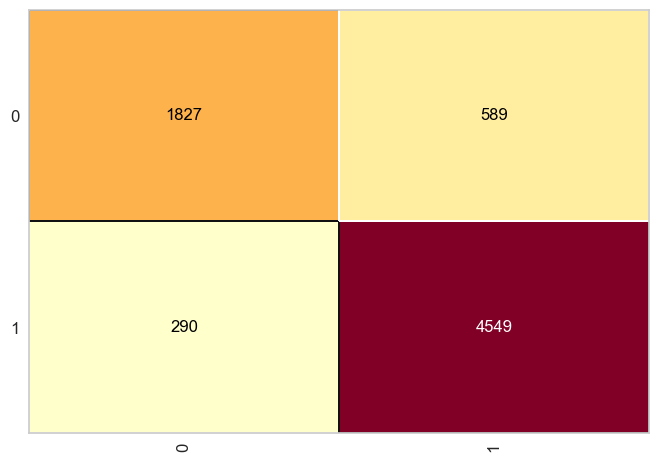

In [21]:
forest_classifier = RandomForestClassifier(criterion='gini', max_depth=11, min_samples_split=3, n_estimators=100)
forest_classifier.fit(x_train, y_train)
y_pred = forest_classifier.predict(x_test)

cm = ConfusionMatrix(forest_classifier)
cm.fit(x_train, y_train)
cm.score(x_test, y_test)

[Text(0.4791666666666667, 0.9285714285714286, 'arrival_year <= -0.835\ngini = 0.442\nsamples = 18428\nvalue = [9560, 19460]'),
 Text(0.2569444444444444, 0.7857142857142857, 'room_type_reserved <= 0.565\ngini = 0.26\nsamples = 3321\nvalue = [806, 4435]'),
 Text(0.1361111111111111, 0.6428571428571429, 'arrival_month <= 0.025\ngini = 0.279\nsamples = 2939\nvalue = [773, 3848]'),
 Text(0.07222222222222222, 0.5, 'no_of_children <= 0.98\ngini = 0.427\nsamples = 190\nvalue = [215, 96]'),
 Text(0.044444444444444446, 0.35714285714285715, 'arrival_date <= 1.247\ngini = 0.416\nsamples = 184\nvalue = [213, 89]'),
 Text(0.022222222222222223, 0.21428571428571427, 'avg_price_per_room <= -0.155\ngini = 0.366\nsamples = 163\nvalue = [204, 65]'),
 Text(0.011111111111111112, 0.07142857142857142, '\n  (...)  \n'),
 Text(0.03333333333333333, 0.07142857142857142, '\n  (...)  \n'),
 Text(0.06666666666666667, 0.21428571428571427, 'avg_price_per_room <= -1.311\ngini = 0.397\nsamples = 21\nvalue = [9, 24]'),
 T

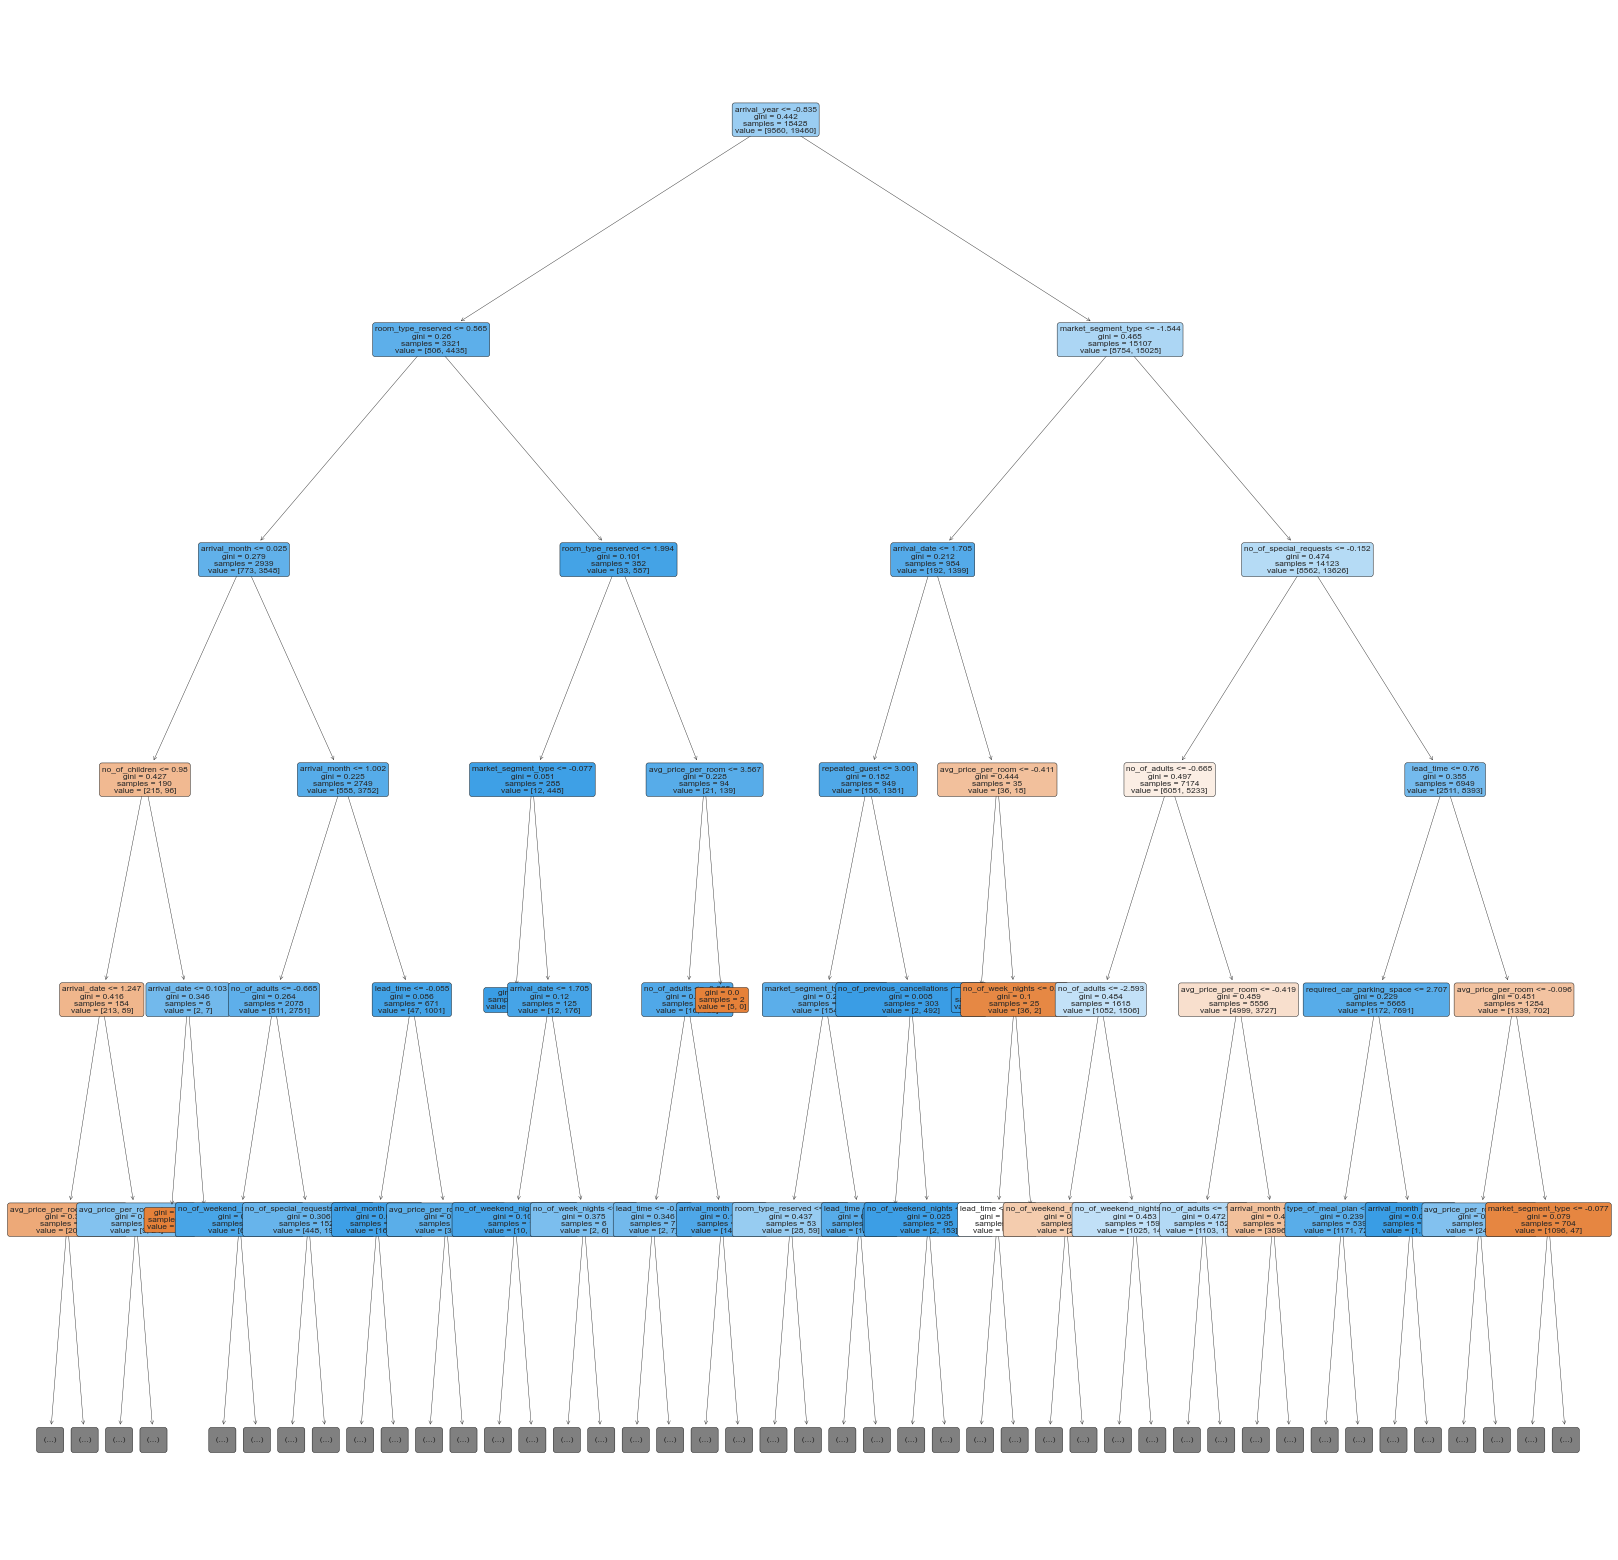

In [22]:
#We plotted a tree where the depth was 5, to show how the tree is built
plt.figure(figsize=(20,20))
plot_tree(forest_classifier.estimators_[1], feature_names=X_not_altered.columns, filled=True, rounded=True, fontsize=6, max_depth=5)

# xgBoost

In [223]:
n_estimators = np.array([100])
max_nvl = np.array([3, 4, 5, 6, 7, 9, 11])
values_grid = {'xgbclassifier__n_estimators': n_estimators, 'xgbclassifier__max_depth': max_nvl}
classifier = make_pipeline(StandardScaler(), SMOTE(random_state=100), XGBClassifier()) 

gridXGBoost = GridSearchCV(classifier , param_grid = values_grid, cv = kf, scoring = scoring, n_jobs = -1, refit = False)

In [224]:
gridXGBoost.fit(X, y)

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('smote', SMOTE(random_state=100)),
                                       ('xgbclassifier',
                                        XGBClassifier(base_score=None,
                                                      booster=None,
                                                      callbacks=None,
                                                      colsample_bylevel=None,
                                                      colsample_bynode=None,
                                                      colsample_bytree=None,
                                                      early_stopping_rounds=None,
                                                      enable_categorical=Fal...
                                                      max_leaves=None,
                                                      min_child_weight=None,
                                                      missing=nan,
                                                      monotone_constraints=None,
                                                      n_estimators=100,
                                                      n_jobs=None,
                                                      num_parallel_tree=None,
                                                      predictor=None,
                                                      random_state=None, ...))]),
             n_jobs=-1,
             param_grid={'xgbclassifier__max_depth': array([ 3,  4,  5,  6,  7,  9, 11]),
                         'xgbclassifier__n_estimators': array([100])},
             refit=False,
             scoring=['accuracy', 'precision', 'recall', 'f1', 'roc_auc'])

In [225]:
columns = ["mean_test_accuracy", "mean_test_precision", "mean_test_recall", "mean_test_f1", "mean_test_roc_auc"]
params = pd.DataFrame(gridXGBoost.cv_results_['params'])
scores = pd.DataFrame(gridXGBoost.cv_results_)[columns]
scores = pd.concat([params, scores], axis=1)

#rename columns
scores.columns = ['max_depth', 'n_estimators', 'accuracy', 'precision', 'recall', 'f1', 'roc_auc']
scores.sort_values(by=['accuracy'], ascending=False)

,max_depth,n_estimators,accuracy,precision,recall,f1,roc_auc
6,11,100,0.897753,0.918842,0.930097,0.924423,0.956994
5,9,100,0.896320,0.918709,0.927915,0.923279,0.956821
4,7,100,0.893535,0.915723,0.926975,0.921305,0.954392
3,6,100,0.887829,0.911667,0.922590,0.917083,0.951227
2,5,100,0.884025,0.910894,0.917267,0.914054,0.947139
1,4,100,0.876003,0.905799,0.910255,0.908012,0.940132
0,3,100,0.860703,0.901044,0.890667,0.895811,0.928753


0.9006202618883529

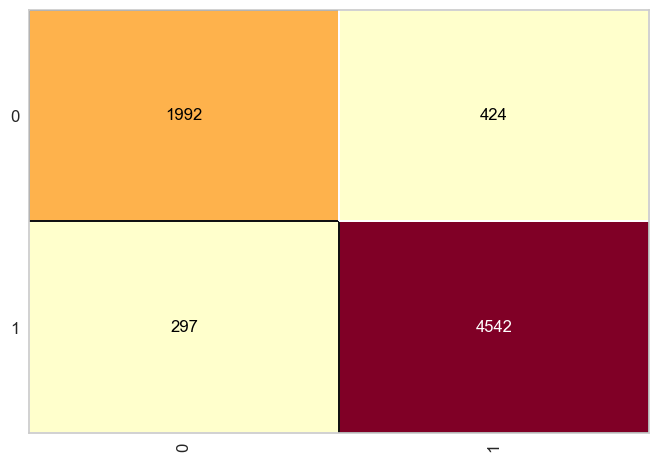

In [17]:
xgb_classifier = XGBClassifier(max_depth=11, n_estimators=100)
xgb_classifier.fit(x_train, y_train)
y_pred = xgb_classifier.predict(x_test)

cm = ConfusionMatrix(xgb_classifier)
cm.fit(x_train, y_train)
cm.score(x_test, y_test)

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.855491 to fit

(process:12652): GLib-GIO-WARNING **: 20:19:53.603: Unexpectedly, UWP app `Clipchamp.Clipchamp_2.5.15.0_neutral__yxz26nhyzhsrt' (AUMId `Clipchamp.Clipchamp_yxz26nhyzhsrt!App') supports 41 extensions but has no verbs

(process:12652): GLib-GIO-WARNING **: 20:19:53.763: Unexpectedly, UWP app `Microsoft.ScreenSketch_11.2302.20.0_x64__8wekyb3d8bbwe' (AUMId `Microsoft.ScreenSketch_8wekyb3d8bbwe!App') supports 29 extensions but has no verbs


<Axes: title={'center': 'XGBoost'}>

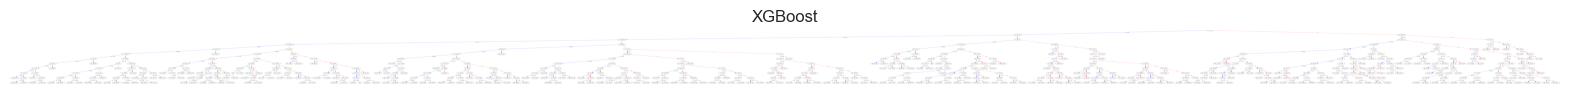

In [18]:
#We plotted a tree where the depth was 5, to show how the tree is built

plt.figure(figsize=(20,20))
ax = plt.subplot(111, title='XGBoost')

plot_tree_xgb(xgb_classifier, num_trees=1, ax=ax)

# SVM

In [9]:
# implement SVM
from sklearn.svm import SVC
# use SVC with linear kernel
kernels = ['linear', 'poly', 'rbf', 'sigmoid'] 
values_grid = {'svc__kernel': kernels, 'svc__C': [0.1, 1, 10, 20] }
classifier = make_pipeline(StandardScaler(), SMOTE(random_state=100), SVC()) 
gridSVM = GridSearchCV(classifier , param_grid = values_grid, cv = kf, scoring = scoring, n_jobs = -1, refit = False)


In [10]:
gridSVM.fit(X, y)

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('smote', SMOTE(random_state=100)),
                                       ('svc', SVC(verbose=True))]),
             n_jobs=-1, param_grid={'svc__C': [0.1], 'svc__kernel': ['linear']},
             refit=False,
             scoring=['accuracy', 'precision', 'recall', 'f1', 'roc_auc'])

In [13]:
columns = ["mean_test_accuracy", "mean_test_precision", "mean_test_recall", "mean_test_f1", "mean_test_roc_auc"]
params = pd.DataFrame(gridSVM.cv_results_['params'])
scores = pd.DataFrame(gridSVM.cv_results_)[columns]
scores = pd.concat([params, scores], axis=1)

#rename columns
scores.columns = ['C', 'kernel', 'accuracy', 'precision', 'recall', 'f1', 'roc_auc']
scores.sort_values(by=['accuracy'], ascending=False)

,svc__C,svc__kernel,mean_test_accuracy,mean_test_precision,mean_test_recall,mean_test_f1,mean_test_roc_auc
0,0.1,linear,0.777367,0.878348,0.776432,0.824227,0.856372


0.8041350792556857

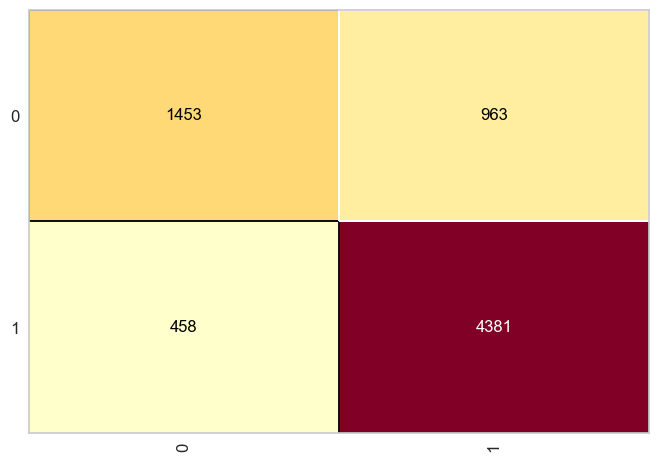

In [14]:
SVC_classifier = SVC(kernel='linear', C=0.1)
SVC_classifier.fit(x_train, y_train)
y_pred = SVC_classifier.predict(x_test)

cm = ConfusionMatrix(SVC_classifier)
cm.fit(x_train, y_train)
cm.score(x_test, y_test)

# ExtraTrees

In [28]:
from sklearn.ensemble import ExtraTreesClassifier

n_estimators = np.array([10, 100, 200])
alg = ['entropy', 'gini', 'log_loss']
values_grid = {'extratreesclassifier__n_estimators': n_estimators, 'extratreesclassifier__criterion': alg}

classifier = make_pipeline(StandardScaler(), SMOTE(random_state=100), ExtraTreesClassifier()) 
gridExTrees = GridSearchCV(classifier, param_grid = values_grid, cv = kf, scoring = scoring, n_jobs = -1, refit = False)

In [29]:
gridExTrees.fit(X, y)

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('smote', SMOTE(random_state=100)),
                                       ('extratreesclassifier',
                                        ExtraTreesClassifier())]),
             n_jobs=-1,
             param_grid={'extratreesclassifier__criterion': ['entropy', 'gini',
                                                             'log_loss'],
                         'extratreesclassifier__n_estimators': array([ 10, 100, 200])},
             refit=False,
             scoring=['accuracy', 'precision', 'recall', 'f1', 'roc_auc'])

In [30]:
columns = ["mean_test_accuracy", "mean_test_precision", "mean_test_recall", "mean_test_f1", "mean_test_roc_auc"]
params = pd.DataFrame(gridExTrees.cv_results_['params'])
scores = pd.DataFrame(gridExTrees.cv_results_)[columns]
scores = pd.concat([params, scores], axis=1)

#rename columns
scores.columns = ['criterion', 'n_estimators', 'accuracy', 'precision', 'recall', 'f1', 'roc_auc']
scores.sort_values(by=['accuracy'], ascending=False)
# scores

,criterion,n_estimators,accuracy,precision,recall,f1,roc_auc
2,entropy,200,0.895217,0.918807,0.926003,0.922388,0.951749
8,log_loss,200,0.895190,0.918699,0.926083,0.922374,0.951866
7,log_loss,100,0.894666,0.918921,0.924976,0.921934,0.951593
4,gini,100,0.894363,0.918741,0.924689,0.921704,0.951284
5,gini,200,0.894170,0.917930,0.925341,0.921618,0.951707
1,entropy,100,0.893728,0.918263,0.924239,0.921236,0.951491
6,log_loss,10,0.884769,0.921864,0.905374,0.913541,0.940068
0,entropy,10,0.883363,0.921018,0.904060,0.912451,0.940124
3,gini,10,0.883032,0.922089,0.902325,0.912095,0.939588


0.9028256374913852

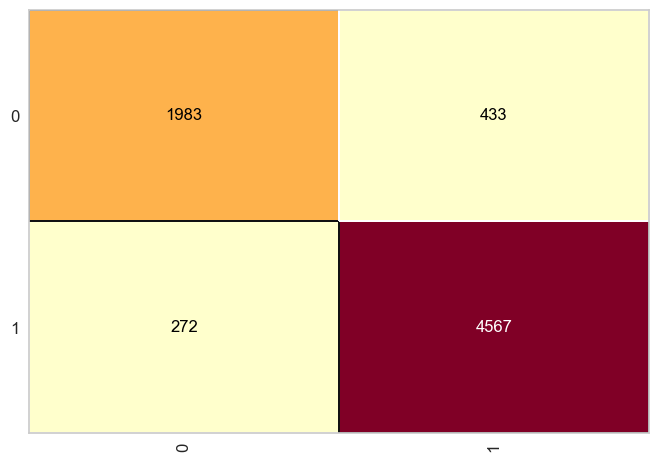

In [177]:
extraTrees_classifier = ExtraTreesClassifier(criterion='entropy', n_estimators=200, max_depth=25) # we noticed that letting the max_depth to be as large as possible resulted in very little improvement, so we set it to 25
extraTrees_classifier.fit(x_train, y_train)
y_pred = extraTrees_classifier.predict(x_test)

cm = ConfusionMatrix(extraTrees_classifier)
cm.fit(x_train, y_train)
cm.score(x_test, y_test)

[Text(0.45694444444444443, 0.9285714285714286, 'type_of_meal_plan <= -0.482\nentropy = 0.911\nsamples = 29020\nvalue = [9469, 19551]'),
 Text(0.19583333333333333, 0.7857142857142857, 'avg_price_per_room <= -2.047\nentropy = 0.893\nsamples = 22274\nvalue = [6902, 15372]'),
 Text(0.07222222222222222, 0.6428571428571429, 'lead_time <= 0.808\nentropy = 0.182\nsamples = 435\nvalue = [12, 423]'),
 Text(0.022222222222222223, 0.5, 'market_segment_type <= -3.624\nentropy = 0.079\nsamples = 410\nvalue = [4, 406]'),
 Text(0.011111111111111112, 0.35714285714285715, 'entropy = 0.0\nsamples = 284\nvalue = [0, 284]'),
 Text(0.03333333333333333, 0.35714285714285715, 'avg_price_per_room <= -2.814\nentropy = 0.203\nsamples = 126\nvalue = [4, 122]'),
 Text(0.022222222222222223, 0.21428571428571427, 'entropy = 0.0\nsamples = 83\nvalue = [0, 83]'),
 Text(0.044444444444444446, 0.21428571428571427, 'lead_time <= -0.69\nentropy = 0.446\nsamples = 43\nvalue = [4, 39]'),
 Text(0.03333333333333333, 0.07142857142

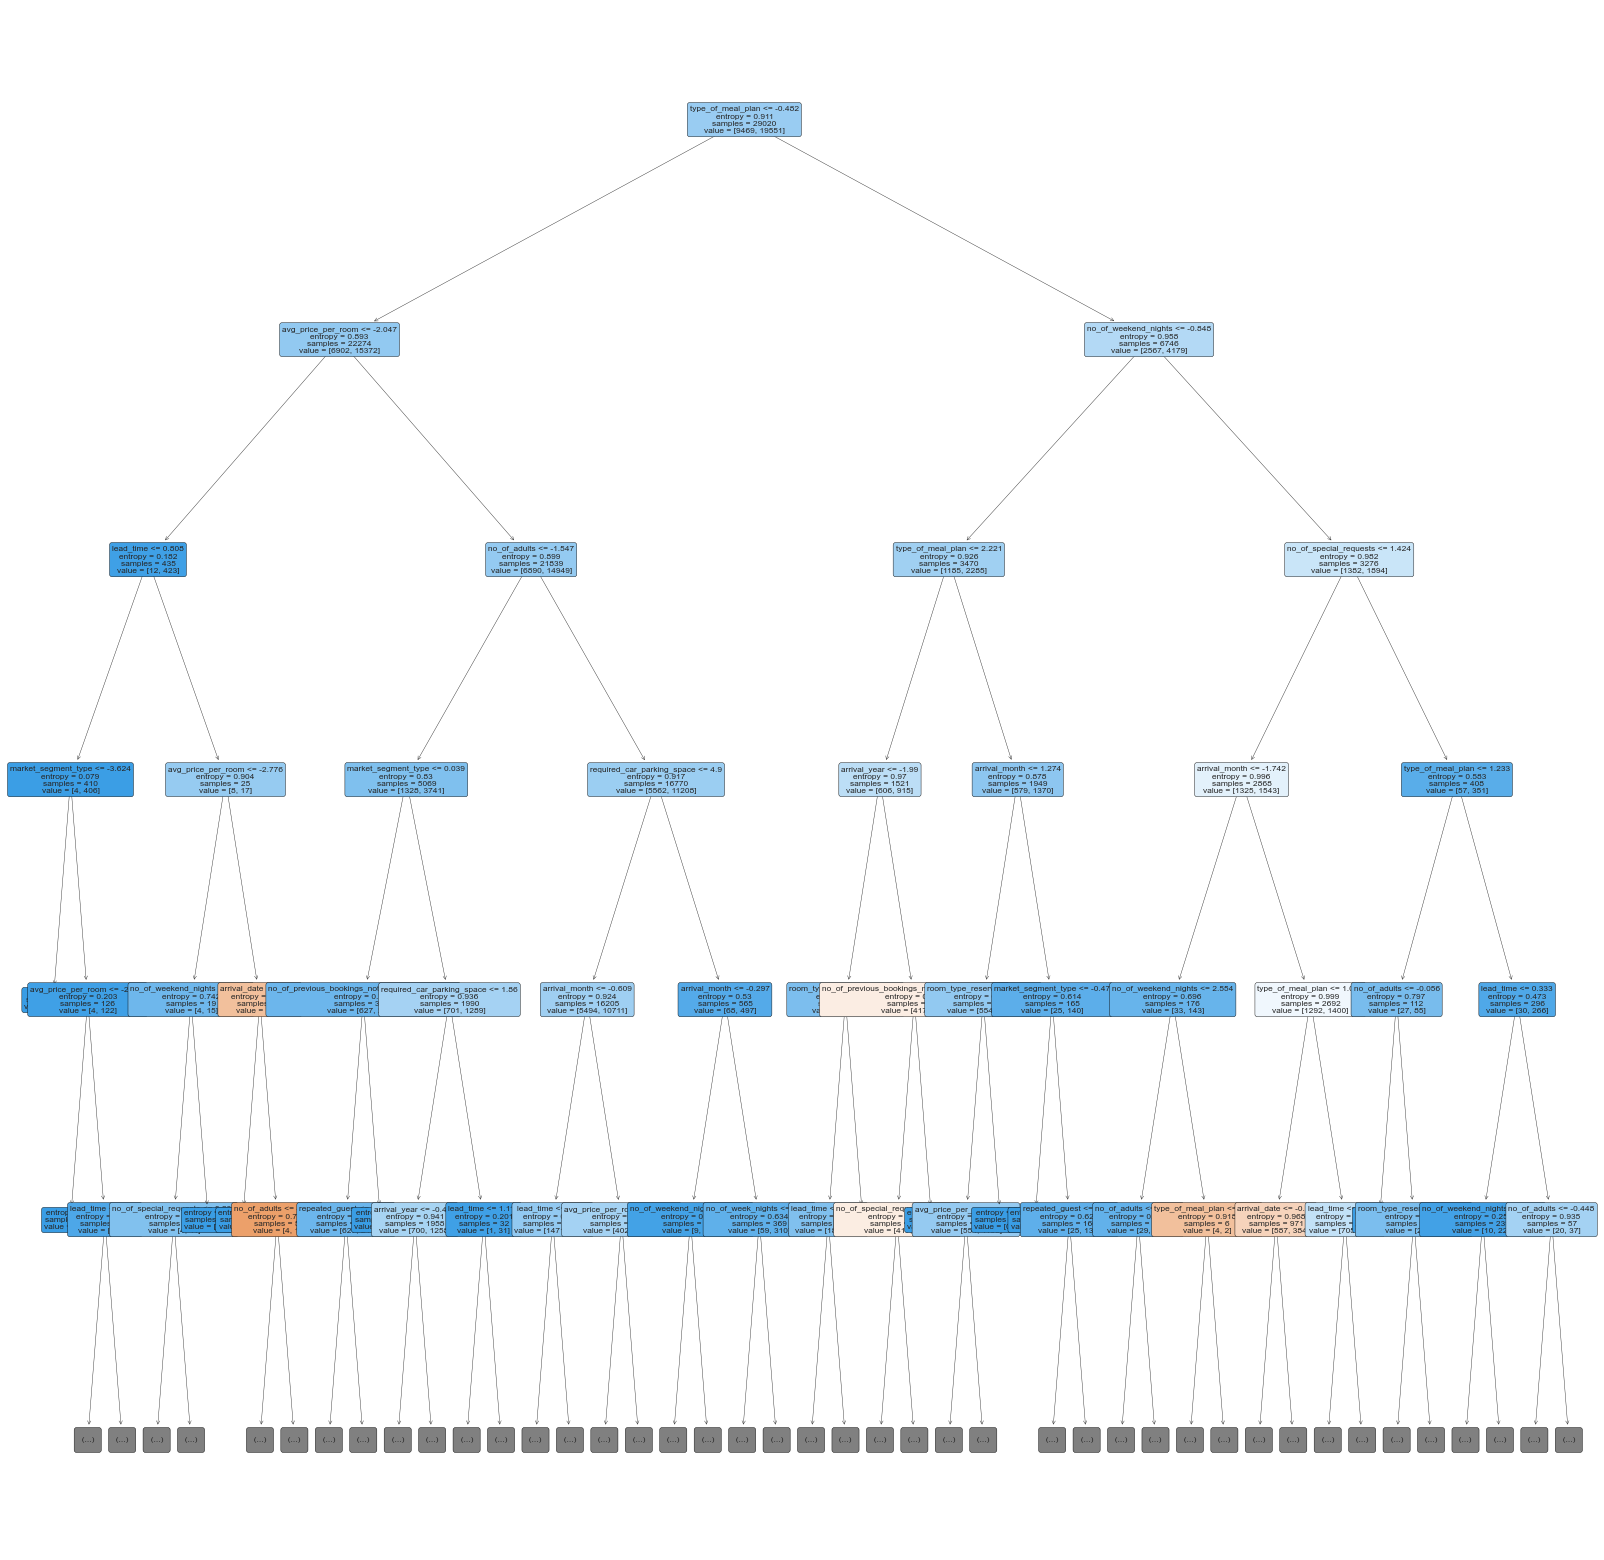

In [178]:
#We plotted a tree where the depth was 5, to show how the tree is built
plt.figure(figsize=(20,20))
plot_tree(extraTrees_classifier.estimators_[1], feature_names=X_not_altered.columns, filled=True, rounded=True, fontsize=6, max_depth=5)

# Observations

- We noticed that using StandardScaler on the data decreased the accuracy on Naive Bayes classifier.
- We noticed that removing arrival_year from the data had little impact on the metrics (maximum 0.2% on each metric).
- Some of the columns are unbalanced (such as arrival_year or no_of_children or repeated_guest) and this may affect the accuracy of the models, and removing them from the data decreased the accuracy of the models in some cases.